In [1]:
import numpy as np
from os.path import abspath, expanduser
from ECOv002_CMR import ECOSTRESS_CMR_search, download_file, GranuleID, download_ECOSTRESS_granule
from koppengeiger import load_koppen_geiger
from GEOS5FP import GEOS5FP
from FLiESANN import FLiESANN

In [2]:
import logging

logging.getLogger().handlers = []

In [3]:
aquisition_date = "2024-10-22"
orbit = 35698
scene = 14
tile = "11SPS"

In [4]:
GEOS5FP_connection = GEOS5FP()
GEOS5FP_connection

{
  "URL": "https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das",
  "download_directory": "~/data/GEOS5FP"
}

In [5]:
L2T_STARS_granule = download_ECOSTRESS_granule(
    product="L2T_STARS", 
    tile=tile, 
    aquisition_date=aquisition_date
)

L2T_STARS_granule

L2TSTARS("/Users/halverso/data/ECOSTRESS/ECOv002_L2T_STARS_11SPS_20241022_0713_01")

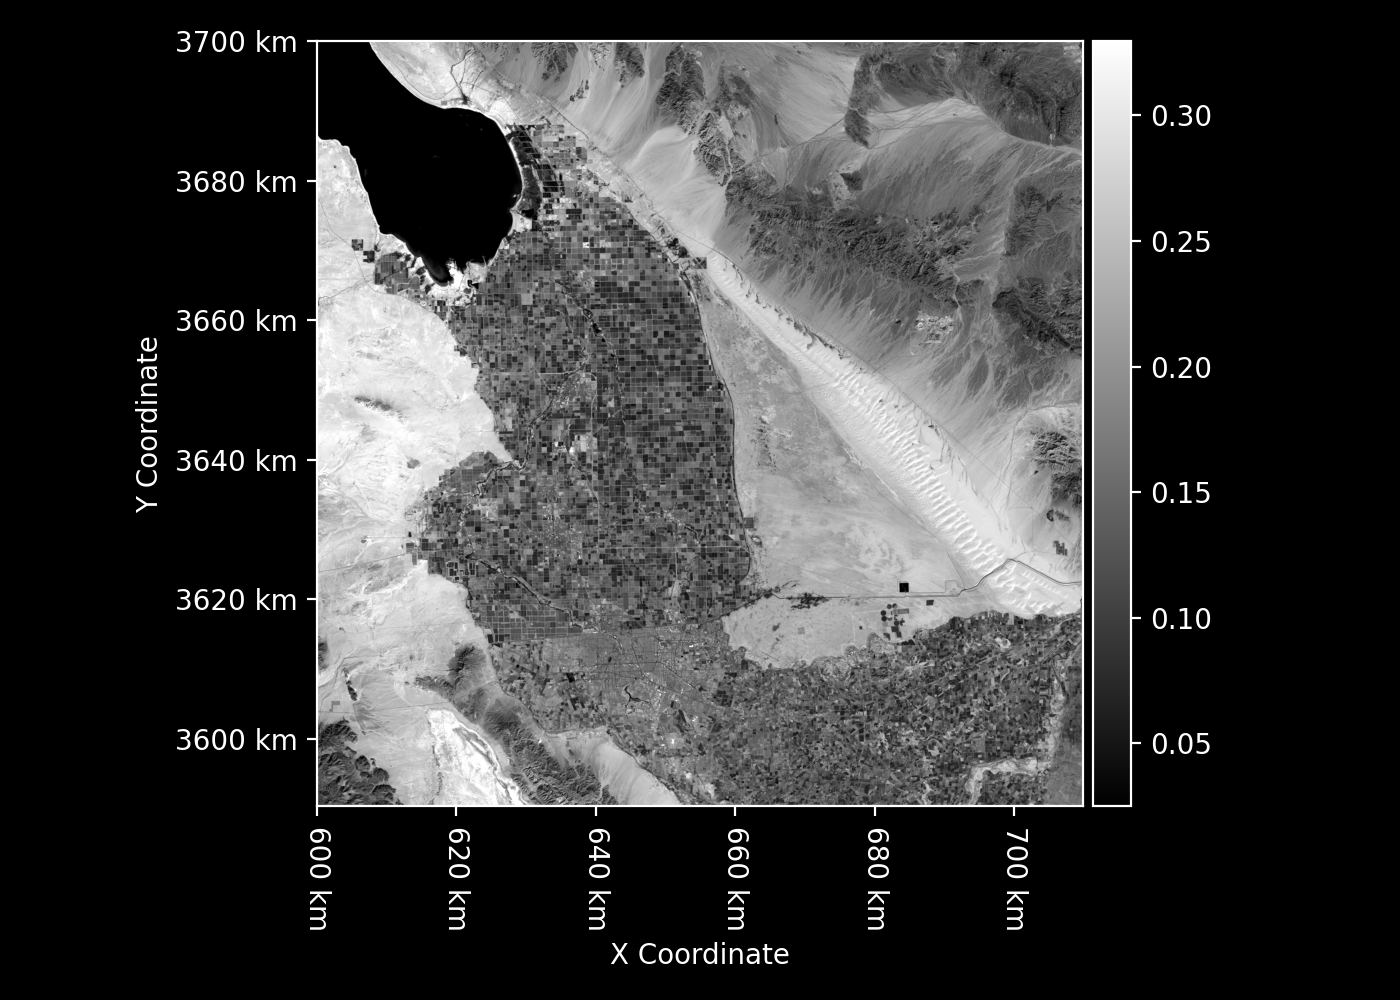

In [6]:
albedo = L2T_STARS_granule.albedo
albedo

In [7]:
time_UTC = L2T_STARS_granule.time_UTC
time_UTC

datetime.datetime(2024, 10, 22, 0, 0)

In [8]:
geometry = L2T_STARS_granule.geometry
geometry

{
  "dimensions": {
    "rows": 1568,
    "cols": 1568
  },
  "bbox": {
    "xmin": 600000.0,
    "ymin": 3590260.0,
    "xmax": 709760.0,
    "ymax": 3700020.0
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 70.0,
    "cell_height": -70.0
  }
}

In [9]:
L2T_LSTE_granule = download_ECOSTRESS_granule(
    product="L2T_LSTE", 
    orbit=orbit,
    scene=scene,
    tile=tile, 
    aquisition_date=aquisition_date
)

L2T_LSTE_granule

L2TLSTE("/Users/halverso/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01")

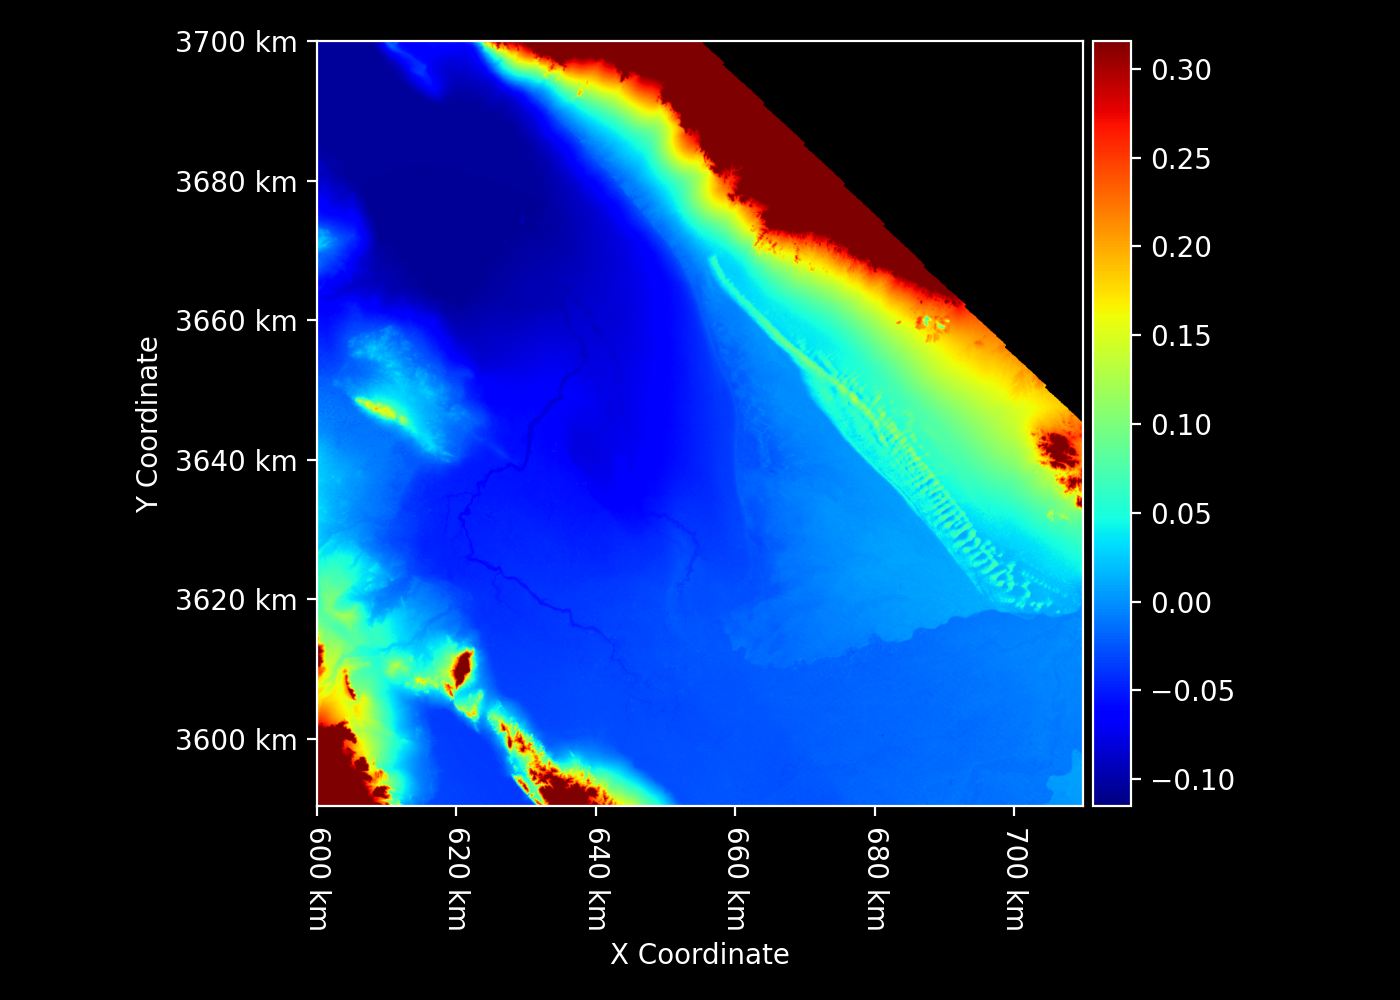

In [10]:
elevation_km = L2T_LSTE_granule.elevation_km
elevation_km

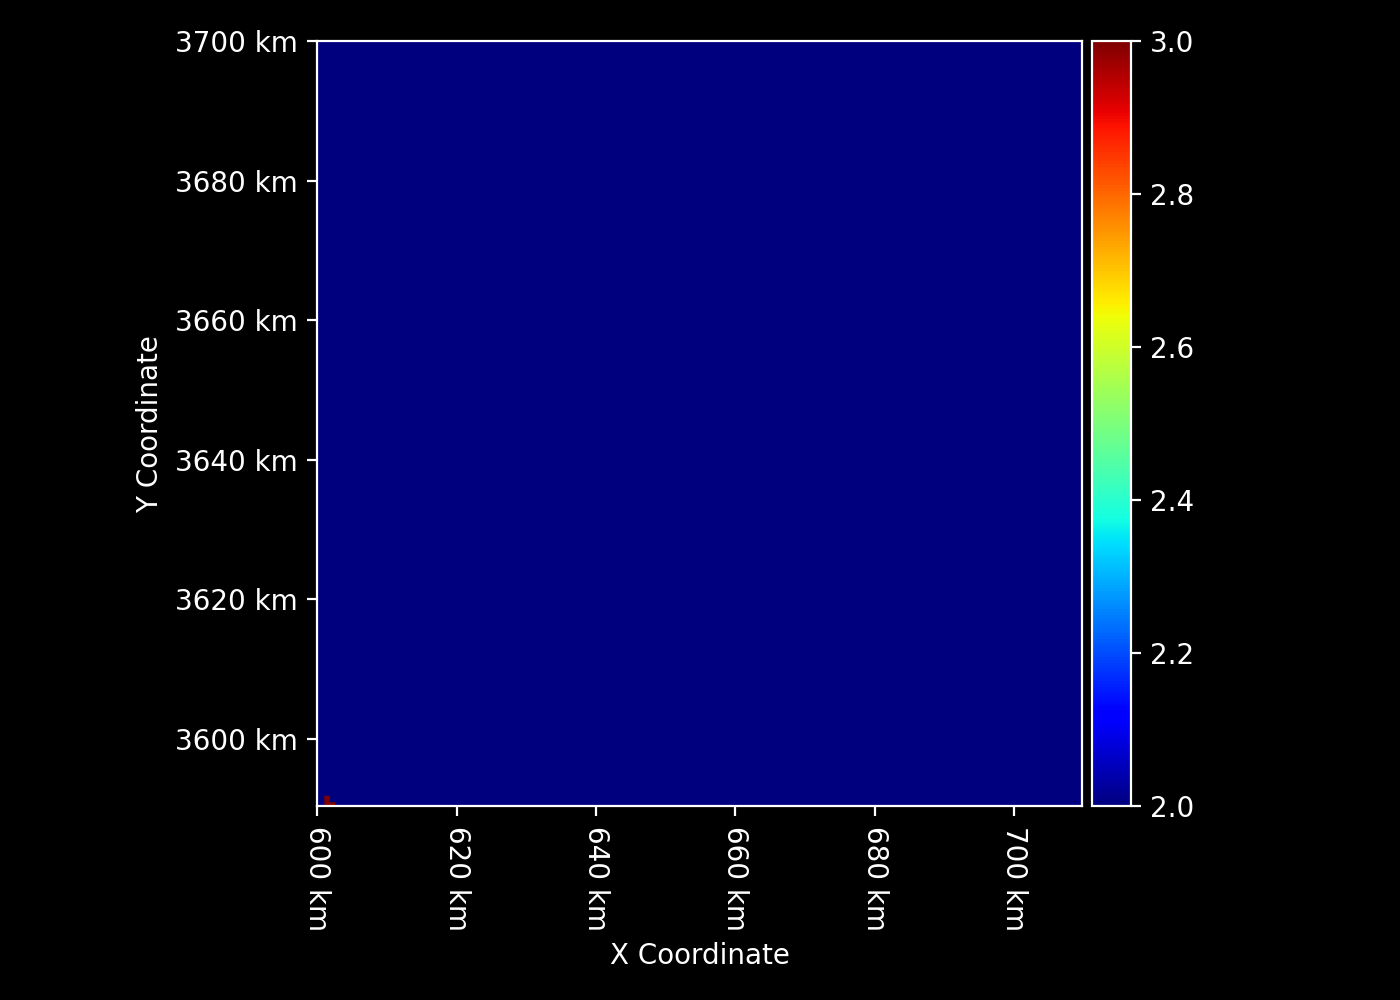

In [11]:
KG_climate = load_koppen_geiger(geometry)
KG_climate

In [12]:
# COT = GEOS5FP_connection.COT(time_UTC=time_UTC, geometry=geometry)
# COT

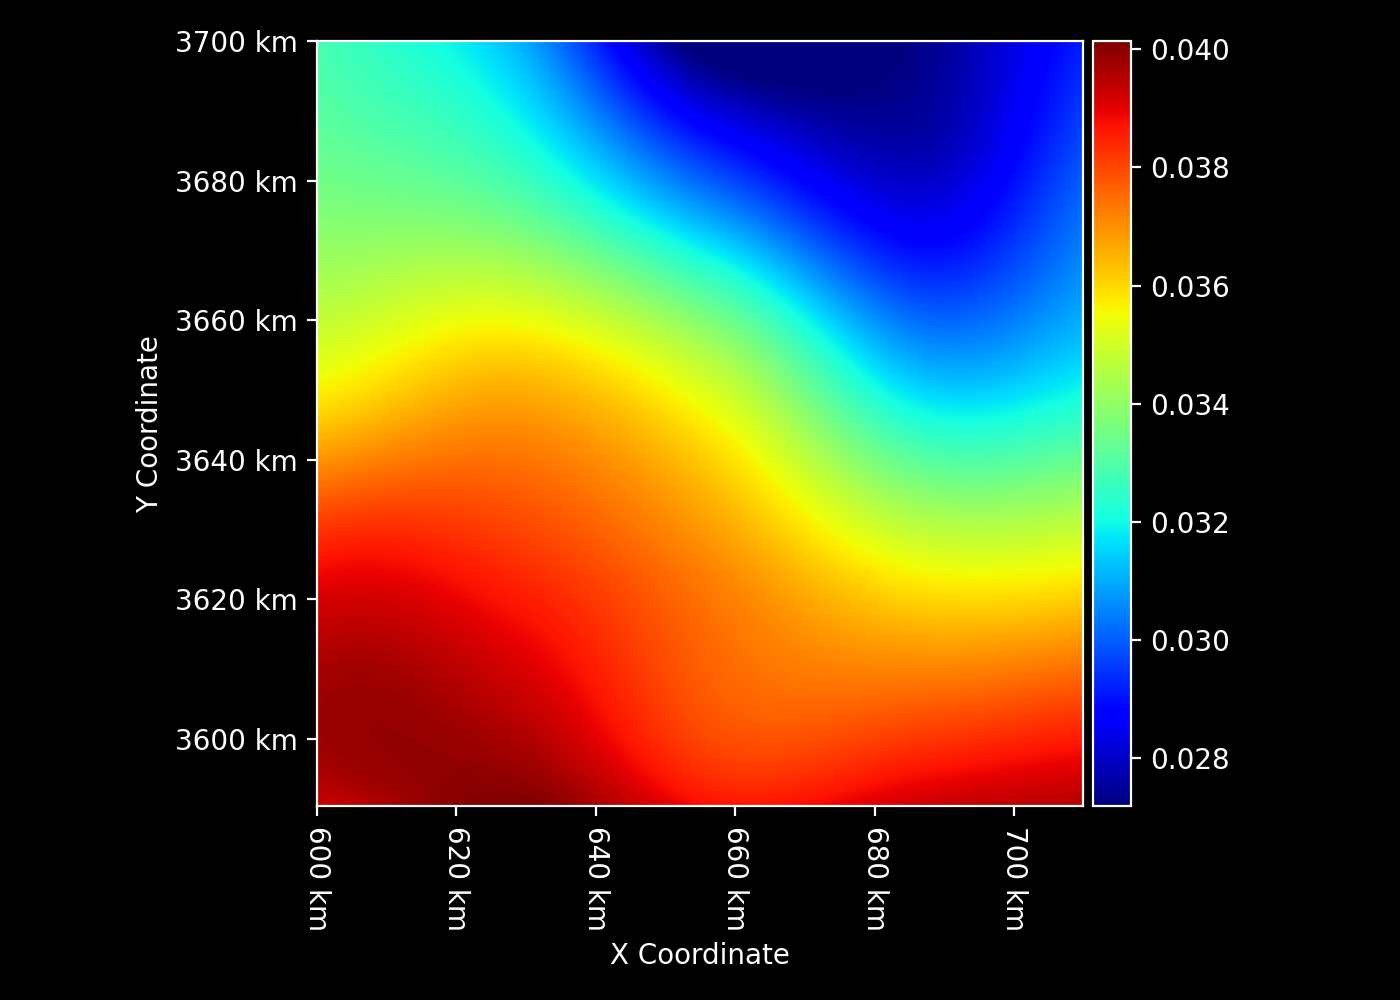

In [13]:
AOT = GEOS5FP_connection.AOT(time_UTC=time_UTC, geometry=geometry)
AOT

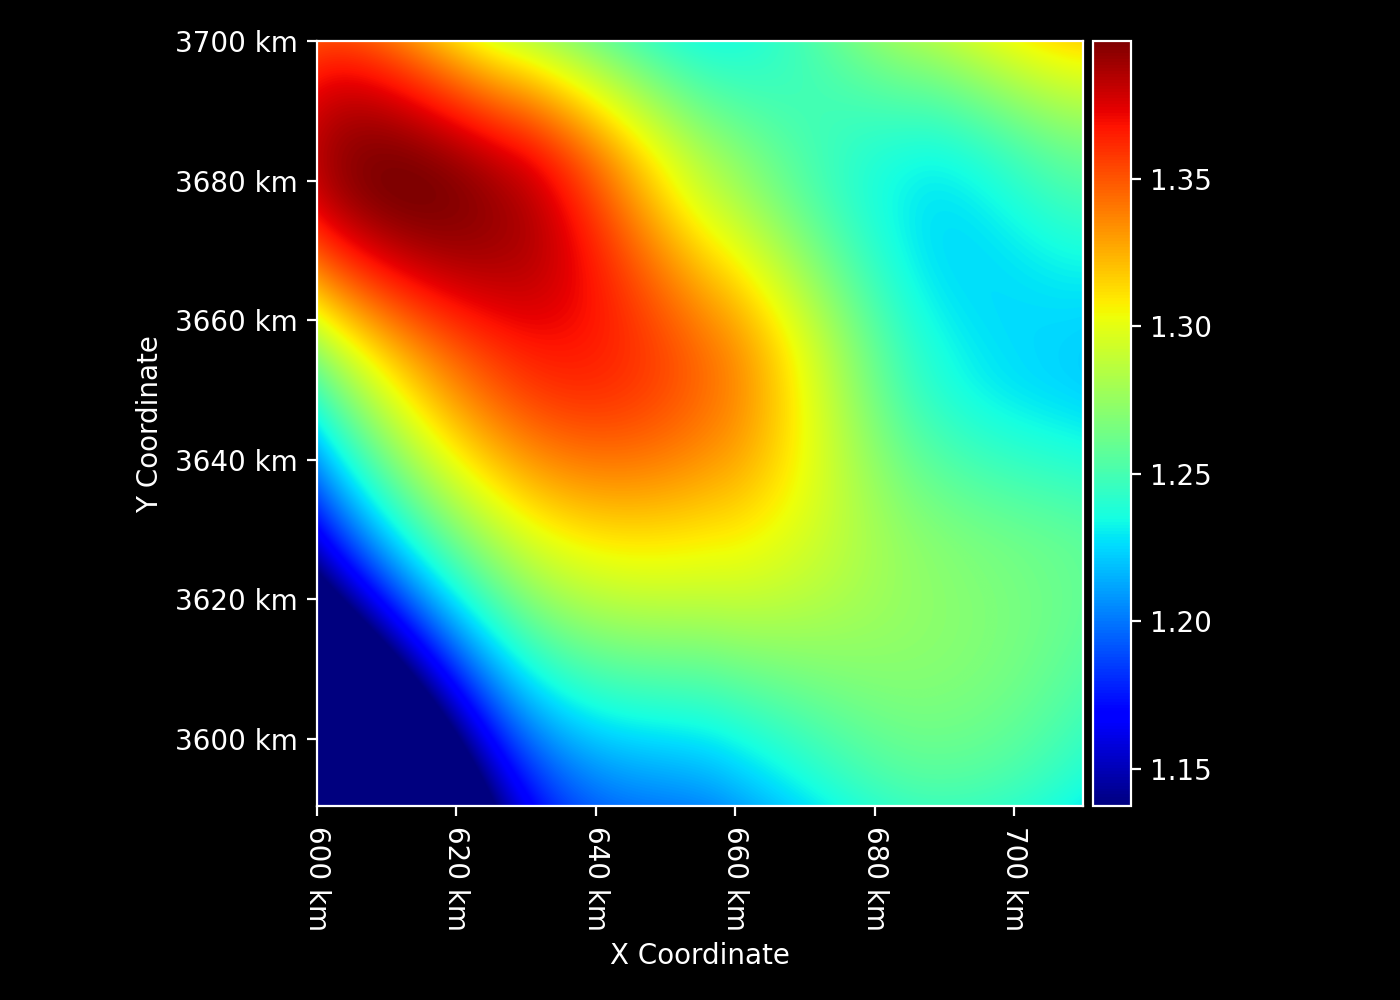

In [14]:
vapor_gccm = GEOS5FP_connection.vapor_gccm(time_UTC=time_UTC, geometry=geometry)
vapor_gccm

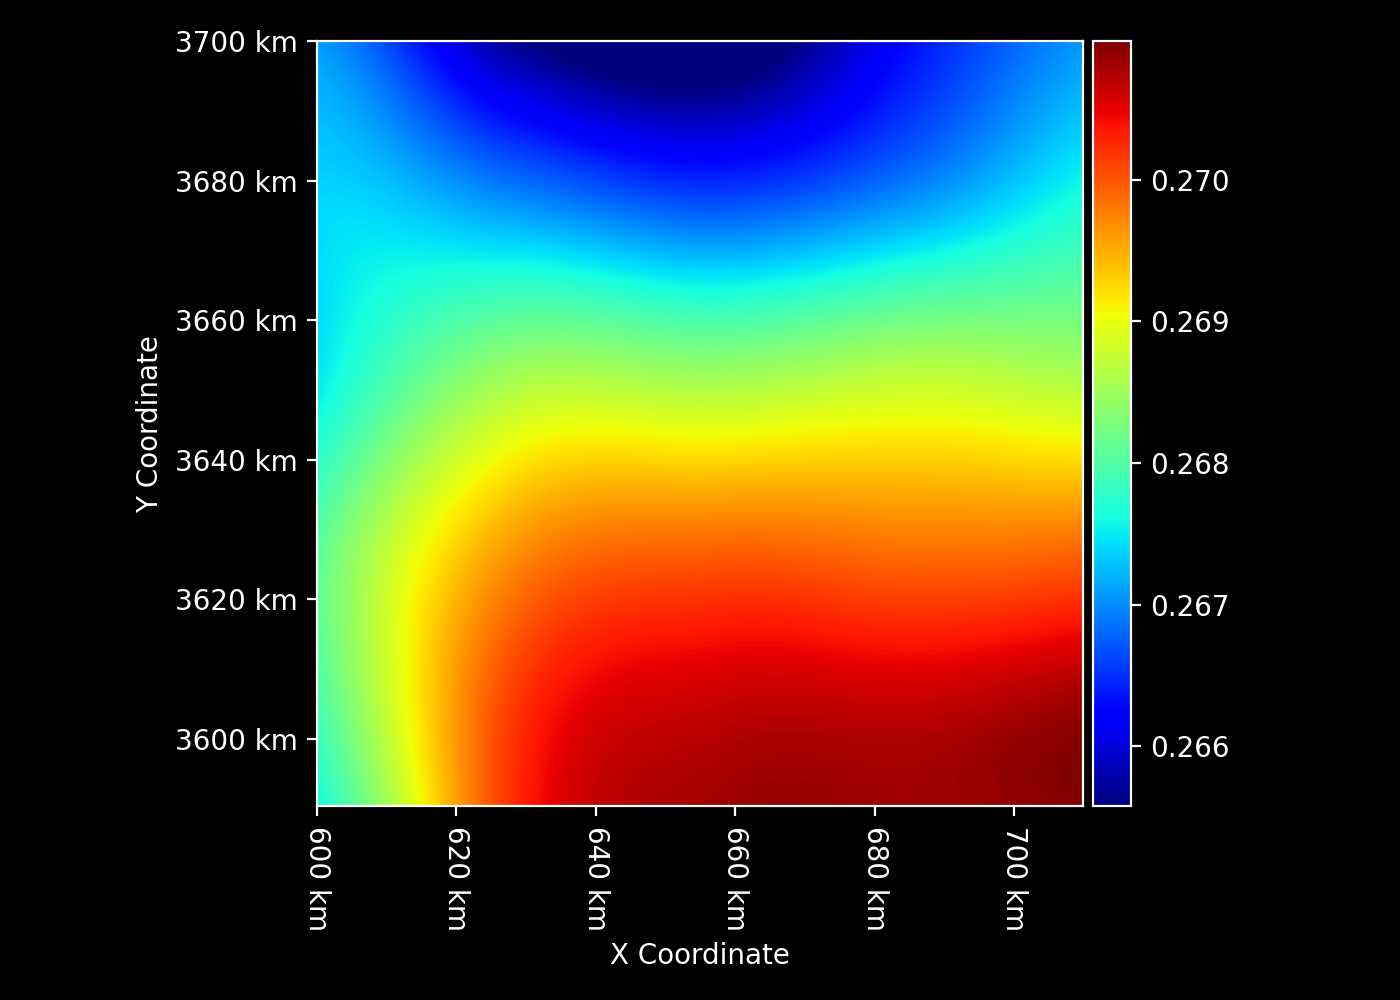

In [15]:
ozone_cm = GEOS5FP_connection.ozone_cm(time_UTC=time_UTC, geometry=geometry)
ozone_cm

76832/76832 ━━━━━━━━━━━━━━━━━━━━ 33s 424us/step


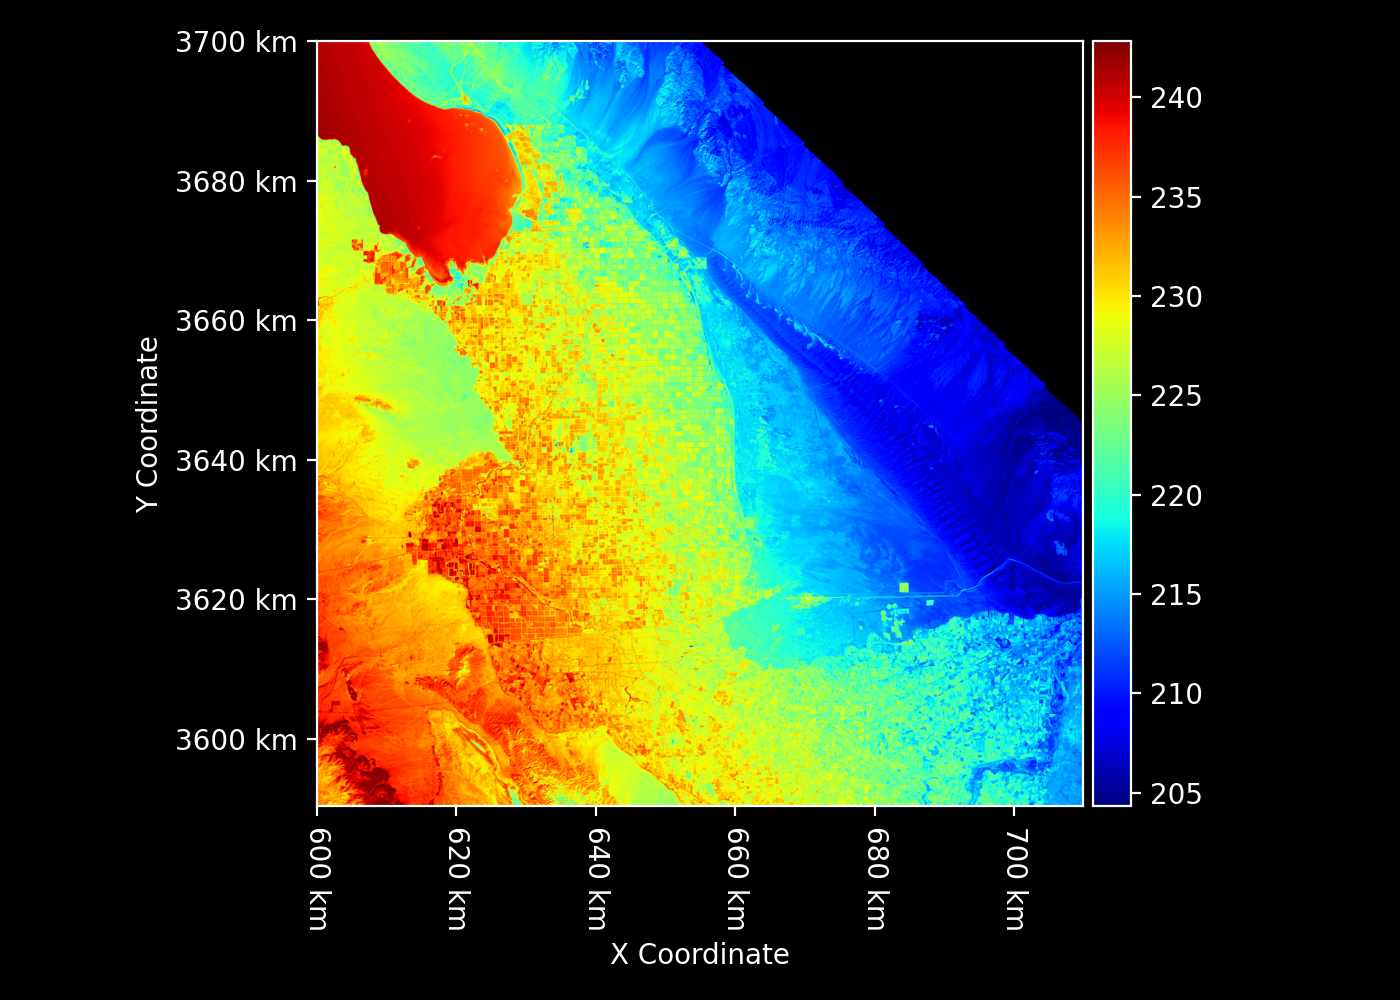

In [16]:
FLiES_results = FLiESANN(
    albedo=albedo,
    geometry=geometry,
    time_UTC=time_UTC,
    elevation_km=elevation_km,
    KG_climate=KG_climate,
    AOT=AOT,
    vapor_gccm=vapor_gccm,
    ozone_cm=ozone_cm,
    zero_COT_correction=True
)

FLiES_results["Rg"]